In [2]:
import contextily as ctx
import geopandas as gpd
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import osmnx
import pandas as pd
import pyproj
import seaborn as sns
from geopy import distance

/home/kaarentenson/PythonV/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Linux
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")
!mv {path} .

100%|██████████████████████████████████████████████████████| 653M/653M [07:59<00:00, 1.43MB/s]

Extracting files...


mv: stat 'path' ei õnnestu: No such file or directory


In [ ]:
# Windows
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")
!move {path} .

In [3]:
filename = "13/US_Accidents_March23.csv"

In [8]:
chunksize = 10**6
locationCounts = {}
DaytonDf = pd.DataFrame()
for chunk in pd.read_csv(filename, chunksize=chunksize):
    # chunk is a DataFrame. To "process" the rows in the chunk:
    if DaytonDf.empty:
        DaytonDf = chunk[chunk["City"] == "Dayton"]
    else:
        DaytonDf = pd.concat([DaytonDf, chunk[chunk["City"] == "Dayton"]])

In [10]:
DaytonDf.to_csv("13/Dayton")

In [38]:
deathDf = DaytonDf[DaytonDf["Description"].str.contains("35")]

In [39]:
deathDf["Description"]

0          Right lane blocked due to accident on I-70 Eas...
3          Accident on I-75 Southbound at Exits 52 52B US...
16         Accident on James H McGee Blvd at US-35. Expec...
58         Accident on US-35 Eastbound at Steve Whalen Bl...
59         Accident on US-35 Eastbound at Smithville Rd. ...
                                 ...                        
7652368    Between Fairfield Rd and OH-835/Research Blvd/...
7652409    Closed at US-35/Exit 13 - Road closed due to a...
7652414    Between Indian Ripple Rd/Exit 10 and US-35/Exi...
7665546    At US-35/Albany St/Exit 52 - Accident. Two lan...
7713777      Between OH-835/Woodman Dr and I-675 - Accident.
Name: Description, Length: 2125, dtype: object

In [2]:
DaytonDf = pd.read_csv("13/Dayton.csv")

In [5]:
DaytonDf

,Unnamed: 0,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
2,4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
3,6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
4,7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24567,7719887,A-7769255,Source1,2,2019-08-05 20:21:34,2019-08-06 00:21:34,45.237050,-123.064840,45.236291,-123.066924,...,False,False,False,False,False,False,Day,Day,Day,Day
24568,7720723,A-7770091,Source1,4,2019-08-07 12:37:40,2019-08-07 13:06:36,29.831010,-94.798850,29.829340,-94.810860,...,False,False,False,False,False,False,Day,Day,Day,Day
24569,7721659,A-7771027,Source1,2,2019-08-08 06:33:49,2019-08-08 10:33:49,45.100861,-123.096511,45.099177,-123.094386,...,False,False,False,False,False,False,Day,Day,Day,Day
24570,7724746,A-7774114,Source1,2,2019-08-15 17:15:57,2019-08-15 21:15:56,45.244333,-123.049250,45.243778,-123.050443,...,False,False,False,False,False,False,Day,Day,Day,Day


In [45]:
place = "Dayton, Ohio, USA"
daytonRoad = osmnx.graph_from_place(network_type="drive", query=place)

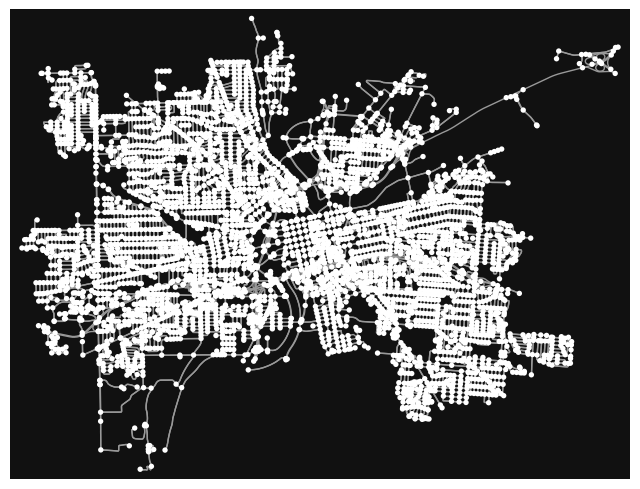

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [46]:
osmnx.plot_graph(daytonRoad)

In [47]:
osmnx.io.save_graphml(daytonRoad, "data/road.graphml")

In [48]:
study_area = osmnx.geocode_to_gdf(place)

<Axes: >

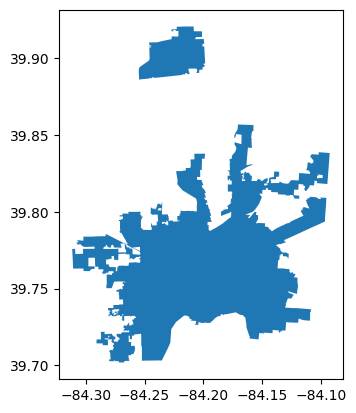

In [49]:
study_area.plot()

In [50]:
road_network = osmnx.load_graphml("data/road.graphml")

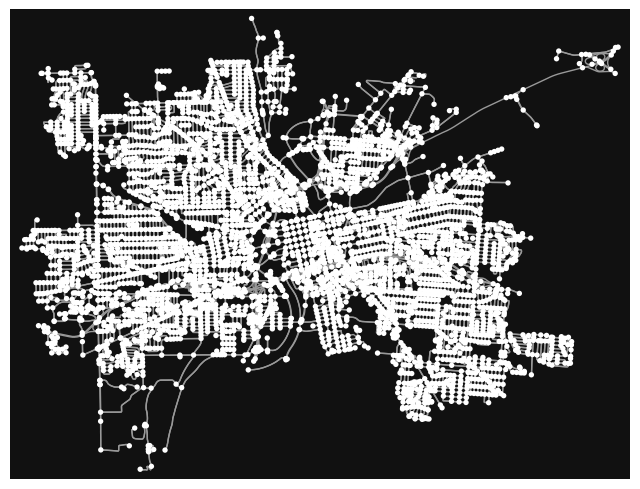

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [51]:
osmnx.plot_graph(road_network)

In [11]:
study_area.geometry.head()

0    MULTIPOLYGON (((-9385499.556 4833421.662, -938...
Name: geometry, dtype: geometry

In [52]:
nodes, edges = osmnx.graph_to_gdfs(road_network)
print("Edges CRS:", edges.crs)
print("Study Area CRS:", study_area.crs)
# edges = edges.to_crs(epsg=3857)
# study_area = study_area.to_crs(epsg=3857)

Edges CRS: epsg:4326
Study Area CRS: epsg:4326


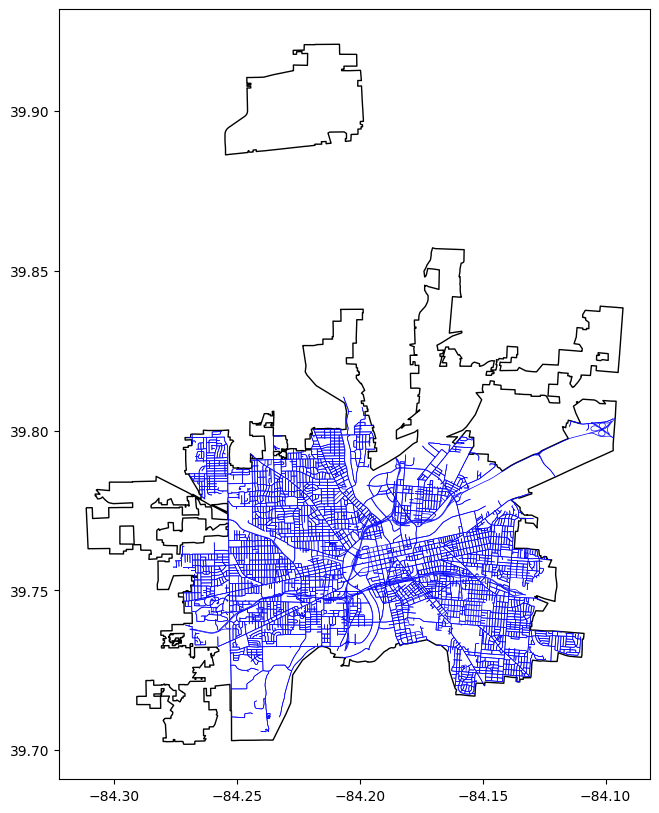

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))
study_area.plot(ax=ax, edgecolor="black", facecolor="none")
edges.plot(ax=ax, edgecolor="blue", linewidth=0.5)
plt.show()

<Axes: >

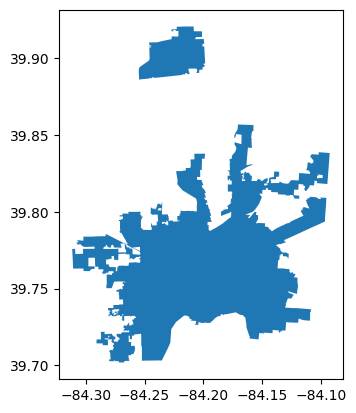

In [17]:
study_area.plot()

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sobhanmoosavi/us-traffic-congestions-2016-2022")
print(path)
!mv {path} .

Resuming download from 27262976 bytes (2457253871 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/sobhanmoosavi/us-traffic-congestions-2016-2022?dataset_version_number=3 (27262976/2484516847) bytes left.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2.31G/2.31G [25:19<00:00, 1.62MB/s]

Extracting files...


/home/kaarentenson/.cache/kagglehub/datasets/sobhanmoosavi/us-traffic-congestions-2016-2022/versions/3


In [5]:
filename = "3/us_congestion_2016_2022/us_congestion_2016_2022.csv"
chunksize = 10**6
DaytonCongestionsDf = pd.DataFrame()
for chunk in pd.read_csv(filename, chunksize=chunksize):
    # chunk is a DataFrame. To "process" the rows in the chunk:
    if DaytonCongestionsDf.empty:
        DaytonCongestionsDf = chunk[
            (chunk["Start_Lng"] > -85.276064)
            & (chunk["Start_Lng"] < -83.0961276)
            & (chunk["Start_Lat"] > 38.705933)
            & (chunk["Start_Lat"] < 40.8105344)
        ]
    else:
        DaytonCongestionsDf = pd.concat([DaytonCongestionsDf, chunk[
            (chunk["Start_Lng"] > -85.276064)
            & (chunk["Start_Lng"] < -83.0961276)
            & (chunk["Start_Lat"] > 38.705933)
            & (chunk["Start_Lat"] < 40.8105344)
        ]])

/tmp/ipykernel_40692/627643642.py:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(filename, chunksize=chunksize):
/tmp/ipykernel_40692/627643642.py:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(filename, chunksize=chunksize):
/tmp/ipykernel_40692/627643642.py:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(filename, chunksize=chunksize):
/tmp/ipykernel_40692/627643642.py:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(filename, chunksize=chunksize):
/tmp/ipykernel_40692/627643642.py:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(filename, chunksize=chunksize):
/tmp/ipykernel_

In [6]:
DaytonCongestionsDf

,ID,Severity,Start_Lat,Start_Lng,StartTime,EndTime,Distance(mi),DelayFromTypicalTraffic(mins),DelayFromFreeFlowSpeed(mins),Congestion_Speed,...,Temperature(F),WindChill(F),Humidity(%),Pressure(in),Visibility(mi),WindDir,WindSpeed(mph),Precipitation(in),Weather_Event,Weather_Conditions
12302,C-12303,2,39.853279,-85.201958,2020-11-10T12:15:00.000-05:00,2020-11-10T13:07:49.000-05:00,2.11,3.000000,3.000000,Fast,...,68.0,68.0,67.0,28.98,10.0,SSW,13.0,0.0,NaN,Cloudy
12304,C-12305,1,39.852409,-85.245148,2020-11-10T12:28:00.000-05:00,2020-11-10T13:12:33.000-05:00,2.23,2.000000,2.000000,Moderate,...,68.0,68.0,67.0,28.98,10.0,SSW,13.0,0.0,NaN,Cloudy
12305,C-12306,1,39.853279,-85.201958,2020-11-10T12:37:00.000-05:00,2020-11-10T14:06:43.000-05:00,1.62,1.000000,1.000000,Moderate,...,68.0,68.0,67.0,28.98,10.0,SSW,13.0,0.0,NaN,Cloudy
12321,C-12322,0,39.861595,-84.847618,2020-11-10T13:03:00.000-05:00,2020-11-10T13:45:42.000-05:00,4.09,4.000000,4.000000,Fast,...,73.0,73.0,50.0,28.87,10.0,SSW,20.0,0.0,NaN,Partly Cloudy
12323,C-12324,0,39.830582,-84.891098,2020-11-10T13:09:00.000-05:00,2020-11-10T13:50:25.000-05:00,1.77,0.000000,2.000000,Moderate,...,75.0,75.0,47.0,28.87,10.0,SSW,16.0,0.0,NaN,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33301284,C-33301285,3,39.944225,-83.430115,2017-08-31T22:28:00.000-04:00,2017-08-31T23:08:38.000-04:00,6.27,38.470001,38.470001,Slow,...,62.6,NaN,63.0,30.09,10.0,NE,15.0,NaN,NaN,Clear
33301285,C-33301286,2,39.512817,-83.474197,2017-08-31T22:26:00.000-04:00,2017-08-31T23:11:38.000-04:00,3.20,8.550000,8.550000,Moderate,...,62.1,NaN,84.0,30.05,10.0,NE,13.8,NaN,NaN,Clear
33301286,C-33301287,2,39.356247,-83.556351,2017-08-31T22:27:00.000-04:00,2017-08-31T23:12:30.000-04:00,1.31,11.130000,11.130000,Fast,...,62.1,NaN,84.0,30.05,10.0,NE,13.8,NaN,NaN,Clear
33301287,C-33301288,2,39.055382,-83.980080,2017-08-31T23:05:00.000-04:00,2017-08-31T23:45:29.000-04:00,1.71,11.850000,11.850000,Moderate,...,66.7,NaN,76.0,30.05,10.0,NE,12.7,NaN,NaN,Clear


In [7]:
DaytonCongestionsDf.to_csv("data/DaytonCongestionsDf.csv")

In [8]:
edges["geometry"]

NameError: name 'edges' is not defined